In [1]:
#All the necesary imports
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.special import comb
from itertools import combinations, permutations
from mlxtend.frequent_patterns import apriori, association_rules  
from mlxtend.frequent_patterns import apriori, association_rules
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

C:\Users\shita\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\shita\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
df = pd.read_csv('my_movies.csv')

In [3]:
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
df1 = df.iloc[:,5:]

In [5]:
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sixth Sense,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
Gladiator,10.0,0.7,0.483046,0.0,0.25,1.0,1.0,1.0
LOTR1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Patriot,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
LOTR2,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter2,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
LOTR,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Braveheart,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Green Mile,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0


In [7]:
df1.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [8]:
df1.dtypes

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

In [9]:
df1.shape

(10, 10)

In [12]:
item_sets = {}
te = TransactionEncoder()
te_ary = te.fit(df1).transform(df1)
ap = pd.DataFrame(te_ary, columns=te.columns_)

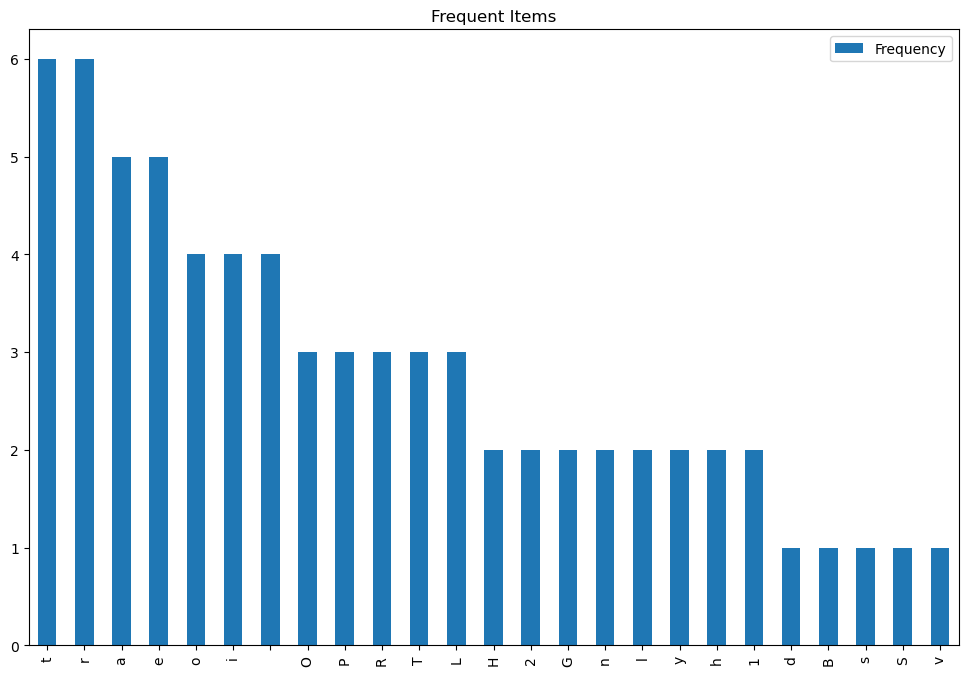

In [13]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

# Apriori algorithm

In [14]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [15]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [16]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)


In [17]:
confs = []

In [18]:
for i in [0.005,0.001,0.003,0.007]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

C:\Users\shita\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\shita\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\shita\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\shita\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types re

C:\Users\shita\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\shita\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\shita\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [19]:
all_conf = pd.concat(confs,axis=1)

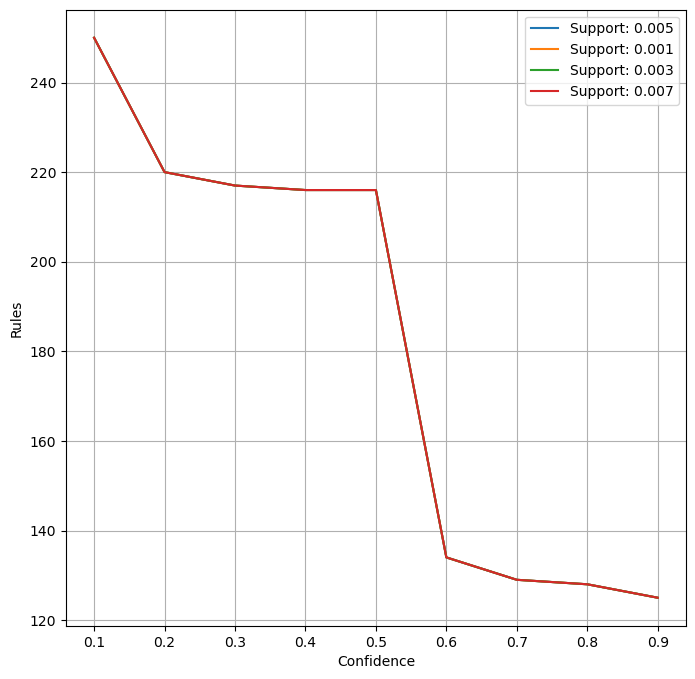

In [20]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

# Lower the Confidence level Higher the no. of rules.

Higher the Support, lower the no. of rules.

# Lets try with Support 0.005 and Confidence at 0.4

In [21]:
ap_final =  apriori(ap,0.005,True)
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(H),( ),0.2,0.4,0.2,1.000000,2.500000,0.12,inf
5,(M),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
7,(P),( ),0.3,0.4,0.2,0.666667,1.666667,0.08,1.8
8,(S),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
11,( ),(e),0.4,0.5,0.4,1.000000,2.000000,0.20,inf
...,...,...,...,...,...,...,...,...,...
113716,"(2, y)","( , r, P, t, H, a, e, o)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113720,"(2, H)","( , r, P, t, y, a, e, o)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113724,"(2, a)","( , r, P, t, y, H, e, o)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113725,"(2, e)","( , r, P, t, y, H, a, o)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf


In [22]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

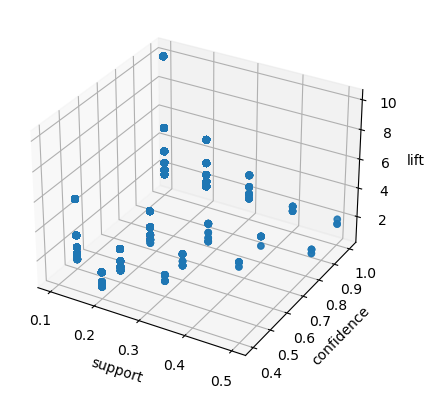

In [23]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

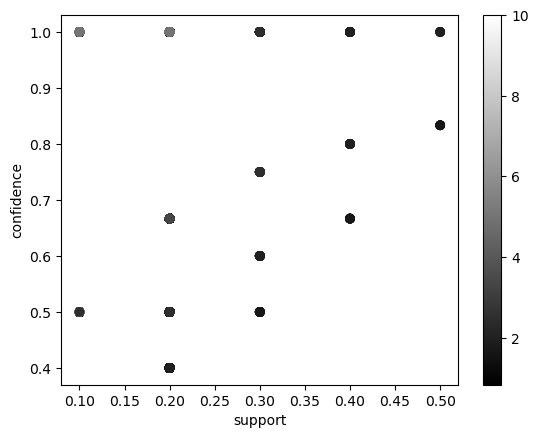

In [24]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")